In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("NFLX.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [3]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [4]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    1009
dtype: int64

In [5]:
df = df.drop("Adj Close", axis = 1)

In [6]:
df1 = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
 6   Change  1009 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
import matplotlib.pyplot as plt

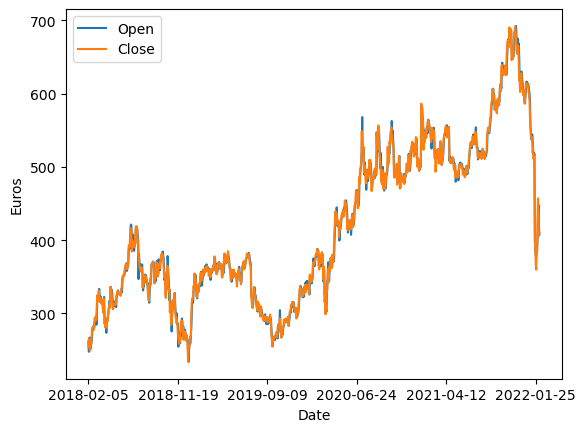

In [9]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

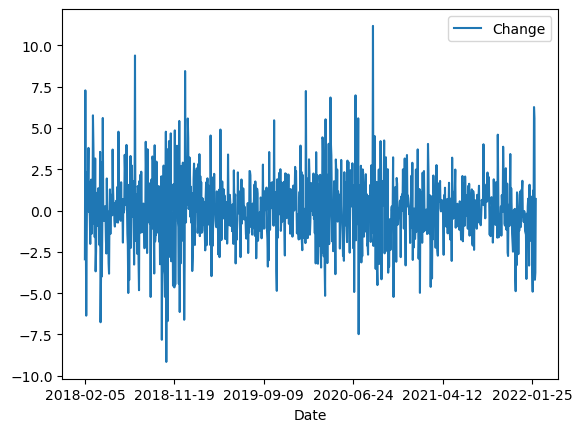

In [10]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

In [14]:
import seaborn as sns

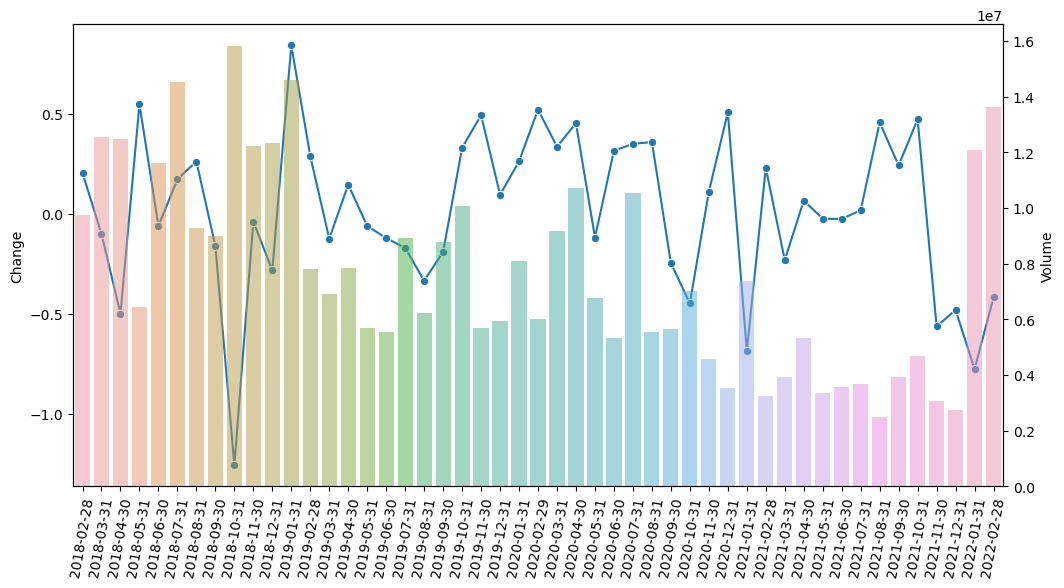

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

In [16]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2018-02-28,Close,272.054705
1,2018-03-31,Close,312.228097
2,2018-04-30,Close,307.466192
3,2018-05-31,Close,331.536819
4,2018-06-30,Close,384.133336
...,...,...,...
93,2021-10-31,Open,639.220474
94,2021-11-30,Open,671.363334
95,2021-12-31,Open,611.568640
96,2022-01-31,Open,492.055000


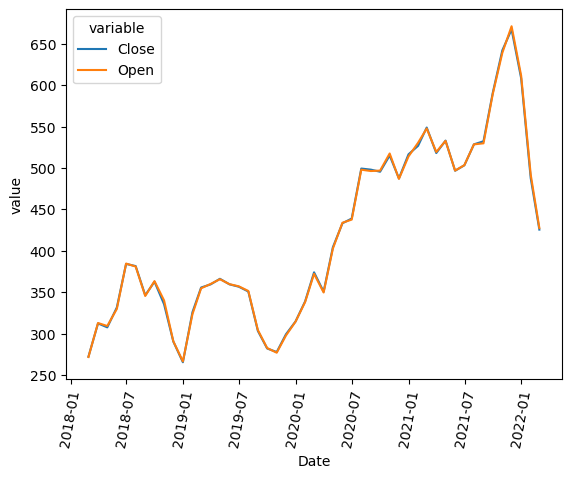

In [17]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df1 = df1.drop("Date",axis = 1)

In [20]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([364.80091291, 328.22631586, 399.78642823, 564.15846634,
       679.13112266, 494.8345951 , 479.05895231, 427.635371  ,
       365.26864139, 408.1452828 , 313.72357755, 447.31832558,
       517.18669903, 374.35174402, 330.23637374, 487.32964237,
       473.54170693, 535.62825603, 362.66988929, 626.04340993,
       364.14787798, 310.01704418, 422.44185   , 429.77208461,
       330.26713657, 539.05472948, 482.00025157, 295.62931864,
       528.07143138, 684.40800658, 380.11562887, 349.48717901,
       355.02663098, 278.65551822, 419.86557649, 478.49617405,
       425.0396411 , 501.75467753, 350.03613192, 483.38640117,
       547.7395667 , 434.41563942, 542.92094514, 288.91697019,
       539.59245354, 334.30308523, 546.38310643, 540.6956656 ,
       506.77773969, 349.48967805, 485.03324075, 350.05156302,
       325.96811683, 490.22449708, 333.20608216, 663.64314567,
       302.17625306, 332.1150276 , 259.24226401, 527.9805462 ,
       357.11655938, 541.83018177, 327.65937918, 258.19

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [25]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [26]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 3.893
RMAE: 1.161
MAE: 1.348
r2: 1.0


In [27]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

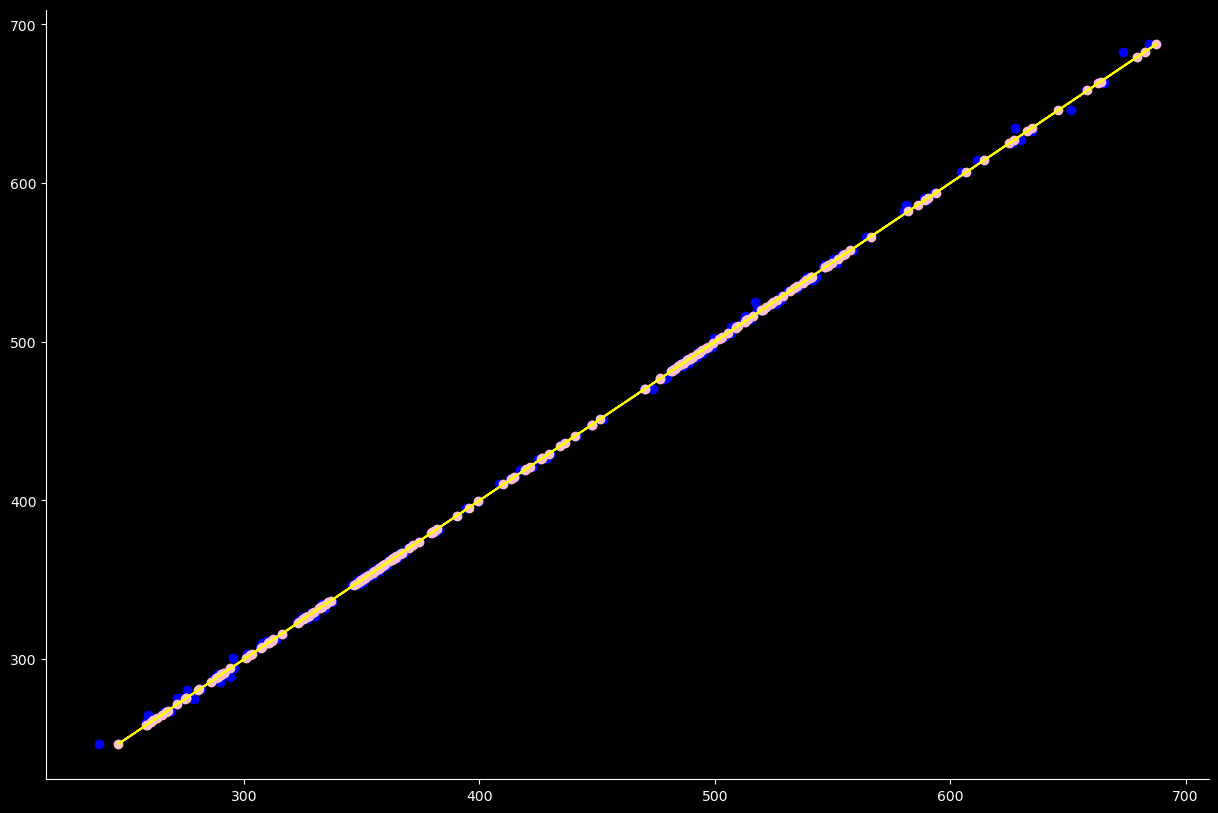

In [28]:
style()

plt.scatter(y_pred, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='pink')
plt.plot(y_test, y_test, color='yellow')